In [160]:
import numpy as np
import pandas as pd

In [161]:
data = pd.read_csv('/content/drive/MyDrive/UFSC/Trabalhos/diabetes_prediction_dataset.csv')
dados_filtrados = data[data['smoking_history'] != 'No Info']
#dados_filtrados = dados_filtrados.drop(columns=['diabetes'], axis=1)
dados_filtrados = dados_filtrados.dropna(how='any')

In [162]:
from scipy import stats
z = np.abs(stats.zscore(dados_filtrados._get_numeric_data()))
dados_filtrados = dados_filtrados[(z < 3).all(axis=1)]
print(dados_filtrados.shape)

(53973, 9)


In [163]:
dados_filtrados['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2},inplace = True)
dados_filtrados['smoking_history'].replace({'never': 0, 'former': 1, 'current': 2, 'not current': 3, 'ever': 4},inplace = True)
#dados_filtrados['gender'].value_counts()
#dados_filtrados['smoking_history'].value_counts()
dados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53973 entries, 2 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               53973 non-null  int64  
 1   age                  53973 non-null  float64
 2   hypertension         53973 non-null  int64  
 3   heart_disease        53973 non-null  int64  
 4   smoking_history      53973 non-null  int64  
 5   bmi                  53973 non-null  float64
 6   HbA1c_level          53973 non-null  float64
 7   blood_glucose_level  53973 non-null  int64  
 8   diabetes             53973 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 4.1 MB


<ipython-input-163-4ed5e25056f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2},inplace = True)
<ipython-input-163-4ed5e25056f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['smoking_history'].replace({'never': 0, 'former': 1, 'current': 2, 'not current': 3, 'ever': 4},inplace = True)


In [164]:
#Padroniza os dados [0 a 1]
#from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler()
#scaler.fit(dados_filtrados)
#dados_filtrados = pd.DataFrame(scaler.transform(dados_filtrados), index=dados_filtrados.index, columns=dados_filtrados.columns)
#dados_filtrados.iloc[4:10]

In [165]:
from sklearn.feature_selection import SelectKBest, chi2
X = dados_filtrados.loc[:,dados_filtrados.columns!='diabetes']
y = dados_filtrados[['diabetes']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['age', 'bmi', 'blood_glucose_level'], dtype='object')


In [166]:
dados_filtrados['age'].value_counts()

80.00    2398
49.00    1015
47.00     997
46.00     997
38.00     996
         ... 
1.00        4
0.40        4
0.16        3
0.64        3
0.56        2
Name: age, Length: 101, dtype: int64

In [167]:
#supervisionado
dados_filtrados = dados_filtrados[['age','HbA1c_level','blood_glucose_level','diabetes']]
X = dados_filtrados[['age']]
y = dados_filtrados[['diabetes']]

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25, random_state=0)
dados_filtrados_train, dados_filtrados_test = train_test_split(dados_filtrados,test_size= 0.25, random_state=0)
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.9404179635393508


In [169]:
#k-means
Y = dados_filtrados[['HbA1c_level']]

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

In [170]:
x = np.column_stack((X.values, Y.values))


kmeans = KMeans(n_clusters=2)

In [171]:
kmeans.fit(x)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)
colors = ["g.","r.","c.","y.","b.","b."]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[28.32025929  5.41642432]
 [60.32236766  5.54902691]]
[0 0 0 ... 1 0 1]


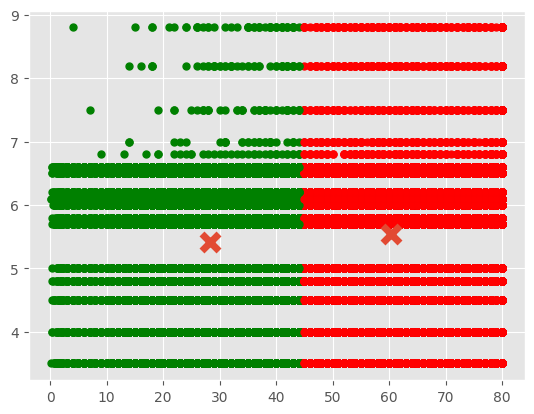

In [177]:
for i in range(len(x)):
  plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize = 10)

plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths =
5, zorder = 10)
plt.show()

In [175]:
#precisão do k-means
from sklearn.metrics import silhouette_score
labels = kmeans.labels_
silhouette_score = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.589011682880699
